In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()
tf.__version__

'2.15.0'

In [2]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

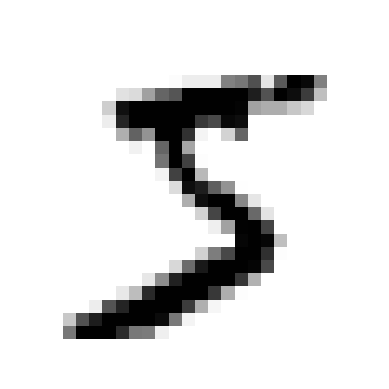

In [4]:

plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [5]:

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

In [6]:

def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:

checkpoint_path = 'training/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])


Epoch 1/10
24/32 [=====================>........] - ETA: 0s - loss: 1.2806 - accuracy: 0.6406
Epoch 1: saving model to training/cp.ckpt
32/32 [==============================] - 2s 19ms/step - loss: 1.1349 - accuracy: 0.6860 - val_loss: 0.7389 - val_accuracy: 0.7700
Epoch 2/10
25/32 [======================>.......] - ETA: 0s - loss: 0.4470 - accuracy: 0.8788
Epoch 2: saving model to training/cp.ckpt
32/32 [==============================] - 0s 13ms/step - loss: 0.4345 - accuracy: 0.8810 - val_loss: 0.5154 - val_accuracy: 0.8380
Epoch 3/10
26/32 [=======================>......] - ETA: 0s - loss: 0.2825 - accuracy: 0.9207
Epoch 3: saving model to training/cp.ckpt
32/32 [==============================] - 0s 13ms/step - loss: 0.2810 - accuracy: 0.9240 - val_loss: 0.4643 - val_accuracy: 0.8480
Epoch 4/10
28/32 [=========================>....] - ETA: 0s - loss: 0.2056 - accuracy: 0.9464
Epoch 4: saving model to training/cp.ckpt
32/32 [==============================] - 1s 17ms/step - loss: 0.20

In [12]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)


32/32 - 1s - loss: 2.3832 - accuracy: 0.0850 - 657ms/epoch - 21ms/step
0.08500000089406967


In [13]:

model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4115 - accuracy: 0.8670 - 96ms/epoch - 3ms/step
0.8669999837875366
